In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

feature_json_root = './feature_importances/all_features/'

In [3]:
os.listdir(feature_json_root)

['feature_importance_gain.json', 'feature_importance_split.json']

In [44]:
# load feature importance gain data
f_gain = open(feature_json_root + 'feature_importance_gain.json')
data_gain = json.load(f_gain)
f_gain.close()
imp_gain = pd.DataFrame({ 'feature_name': data_gain.keys(), 'gain_importance': data_gain.values() })
imp_gain = imp_gain.sort_values(by='gain_importance', ascending=False)

# load feature importance split data
f_split = open(feature_json_root + 'feature_importance_split.json')
data_split = json.load(f_split)
f_split.close()
imp_split = pd.DataFrame({ 'feature_name': data_split.keys(), 'split_importance': data_split.values() })
imp_split = imp_split.sort_values(by='split_importance', ascending=False)

imp = pd.merge(imp_split, imp_gain, on=['feature_name'], how = 'left')
imp['sum'] = imp['gain_importance'] + imp['split_importance']
print("The NaN count in imp : imp_gain : imp_split", imp.isna().sum().sum(), imp_gain.isna().sum().sum(), imp_split.isna().sum().sum())

The NaN count in imp : imp_gain : imp_split 0 0 0


In [45]:
imp.describe()

,split_importance,gain_importance,sum
count,241.000000,241.000000,241.000000
mean,207.813278,2071.938583,2279.751861
std,266.922013,17510.083876,17543.156631
min,16.000000,6.763926,24.763926
25%,115.000000,81.135896,200.195734
50%,163.000000,126.778502,282.503909
75%,255.000000,489.396984,776.173110
max,3844.000000,253017.506156,253517.506156


Text(0.5, 1.0, 'importance gain')

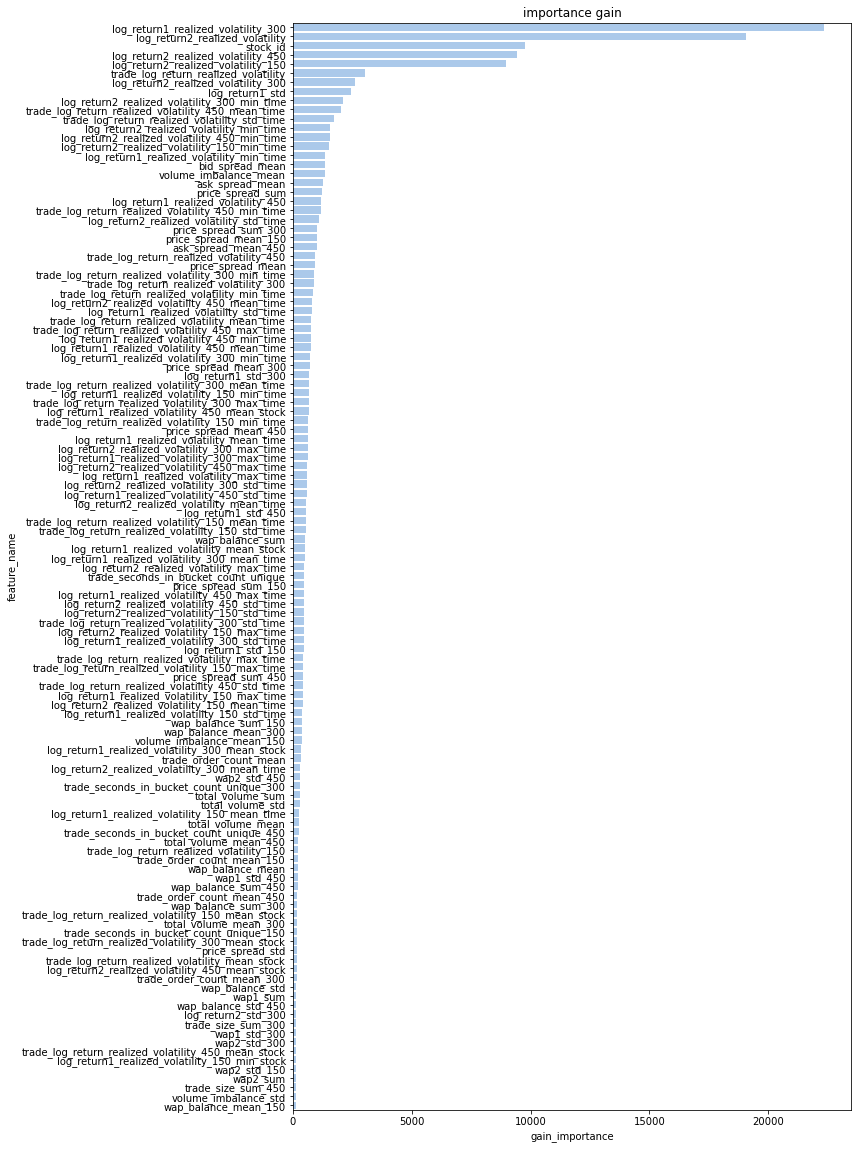

In [50]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.set_color_codes("pastel")
sns.barplot(x="gain_importance", y="feature_name", data=imp.loc[(imp['gain_importance'] > 126) & (imp['gain_importance'] < 25000)].sort_values(by='gain_importance', ascending=False), ax=ax, color='b')
ax.set_title('gain importance')

Text(0.5, 1.0, 'split importance')

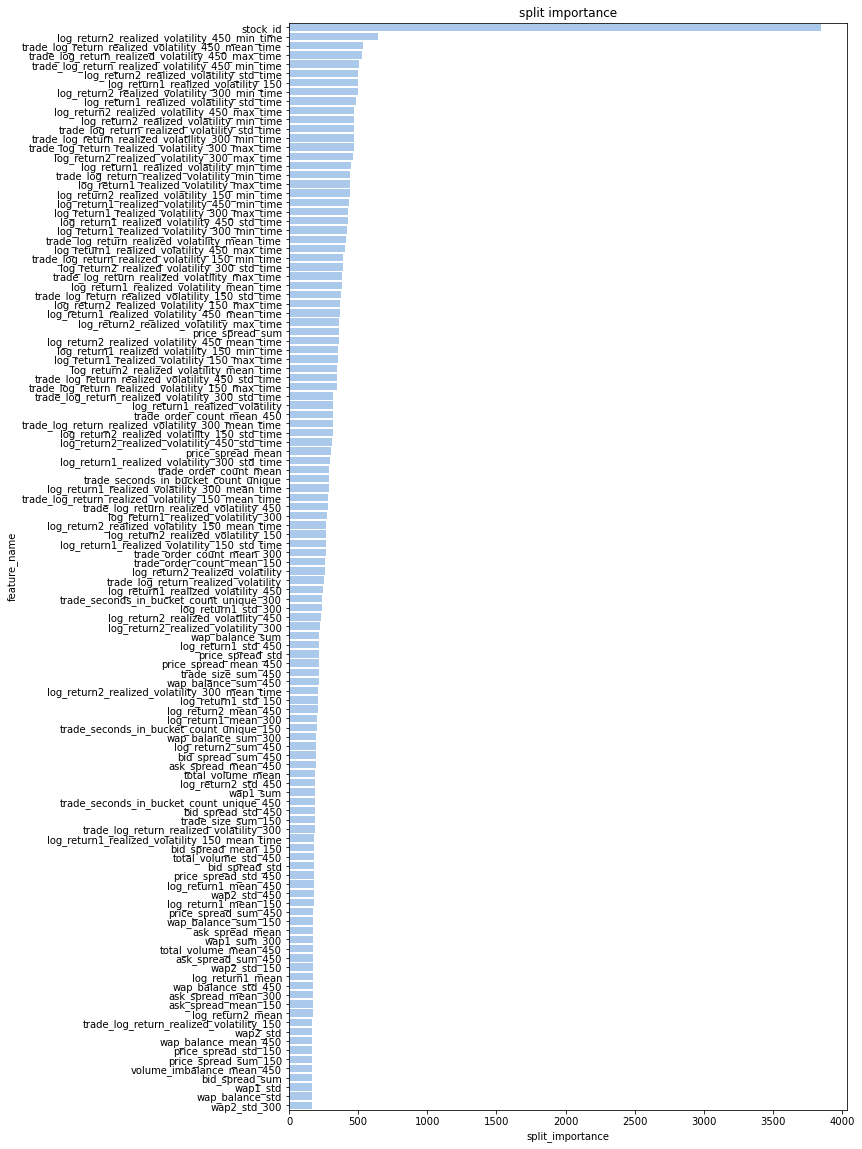

In [52]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.set_color_codes("pastel")
sns.barplot(x="split_importance", y="feature_name", data=imp.loc[imp['split_importance'] > 163].sort_values(by='split_importance', ascending=False), ax=ax, color='b')
ax.set_title('split importance')

Text(0.5, 1.0, 'sum importance')

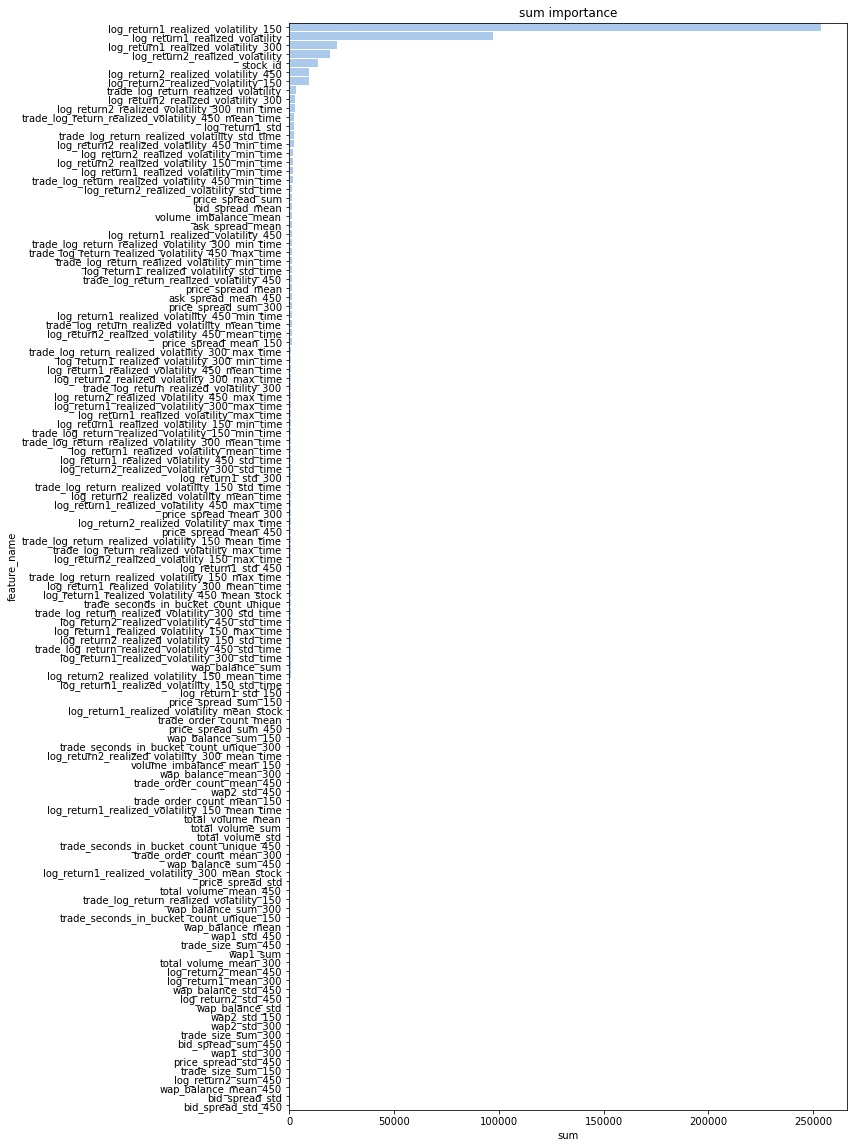

In [53]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.set_color_codes("pastel")
sns.barplot(x="sum", y="feature_name", data=imp.loc[imp['sum'] > 280].sort_values(by='sum', ascending=False), ax=ax, color='b')
ax.set_title('sum importance')

In [57]:
imp.loc[imp['sum'] > 281].to_csv('selected_feature_by_sum50percent.csv')

In [58]:
imp.loc[imp['sum'] > 750].to_csv('selected_feature_by_sum75percent.csv')

In [59]:
imp.loc[imp['sum'] > 200].to_csv('selected_feature_by_sum25percent.csv')